## Read solar irradiance data from Sandia ##

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import xarray as xr

In [2]:
# read in raw data and merge into one dataframe
ds = xr.open_dataset("sgpqcradbrs1longC1.c2.20200414.000000.cdf")
ds2 = xr.open_dataset("sgpqcradbrs1longC1.c2.20200415.000000.cdf")
df1 = ds.to_dataframe()
df2 = ds2.to_dataframe()
df = pd.concat([df1, df2])

In [3]:
df.index = pd.DatetimeIndex(pd.to_datetime(df.index, utc=True))

In [4]:
df

,base_time,time_offset,BestEstimate_down_short_hemisp,qc_BestEstimate_down_short_hemisp,source_BestEstimate_down_short_hemisp,down_short_hemisp,qc_down_short_hemisp,aqc_down_short_hemisp,aqc_GSW2SumSW,aqc_DifSW2GSW,...,MFRSR_diffuse_hemisp_broadband,qc_MFRSR_diffuse_hemisp_broadband,MFRSR_direct_normal_broadband,qc_MFRSR_direct_normal_broadband,MFRSR_flag,zenith,sun_earth_distance,lat,lon,alt
time,,,,,,,,,,,,,,,,,,,,,
2020-04-14 00:00:00+00:00,2020-04-14,2020-04-14 00:00:00,40.449860,0,0,40.770054,0,0,-1,-1,...,45.611374,0,0.000000,0,0,78.081100,1.003268,36.605,-97.485001,318.0
2020-04-14 00:01:00+00:00,2020-04-14,2020-04-14 00:01:00,39.853195,0,0,40.169949,0,0,-1,-1,...,44.543125,0,1.086660,0,0,78.280045,1.003269,36.605,-97.485001,318.0
2020-04-14 00:02:00+00:00,2020-04-14,2020-04-14 00:02:00,38.964203,0,0,39.247246,0,0,-1,-1,...,43.795361,0,0.000000,0,0,78.478920,1.003269,36.605,-97.485001,318.0
2020-04-14 00:03:00+00:00,2020-04-14,2020-04-14 00:03:00,37.949257,0,0,38.202431,0,0,-1,-1,...,42.299816,0,1.718294,0,0,78.677719,1.003269,36.605,-97.485001,318.0
2020-04-14 00:04:00+00:00,2020-04-14,2020-04-14 00:04:00,37.195419,0,0,37.450283,0,0,-1,-1,...,41.765690,0,0.577184,0,0,78.876434,1.003269,36.605,-97.485001,318.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-04-15 23:55:00+00:00,2020-04-15,2020-04-15 23:55:00,177.695908,0,0,160.139450,0,0,0,0,...,46.623535,0,569.701111,0,0,76.770264,1.003827,36.605,-97.485001,318.0
2020-04-15 23:56:00+00:00,2020-04-15,2020-04-15 23:56:00,174.654709,0,0,157.317810,0,0,0,0,...,46.623535,0,565.960266,0,0,76.969452,1.003828,36.605,-97.485001,318.0
2020-04-15 23:57:00+00:00,2020-04-15,2020-04-15 23:57:00,171.223541,0,0,154.117798,0,0,0,0,...,45.341640,0,562.405579,0,0,77.168571,1.003828,36.605,-97.485001,318.0


In [5]:
print("lat, lon, alt = ", df["lat"][0], df["lon"][0], df["alt"][0])

lat, lon, alt =  36.605 -97.485 318.0


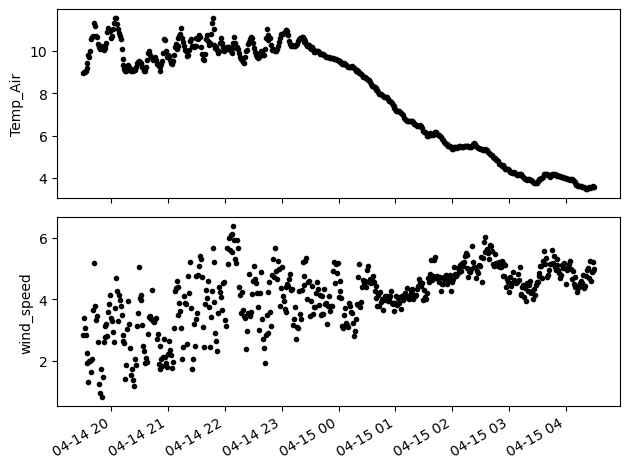

In [6]:
selcols = ["Temp_Air", "wind_speed"]

fig, axs = plt.subplots(2, 1, sharex="col")

tstart = "2020-04-14 19:30:00"
tend = "2020-04-15 04:30:00"
# pdf = df
pdf = df[(df.index >= tstart) & (df.index <= tend)]

for ax, column in zip(axs.ravel(), selcols):
    ax.plot(pdf[column], ".k")
    ax.set_ylabel(column)

fig.autofmt_xdate()
plt.tight_layout()

<function matplotlib.pyplot.tight_layout(*, pad=1.08, h_pad=None, w_pad=None, rect=None)>

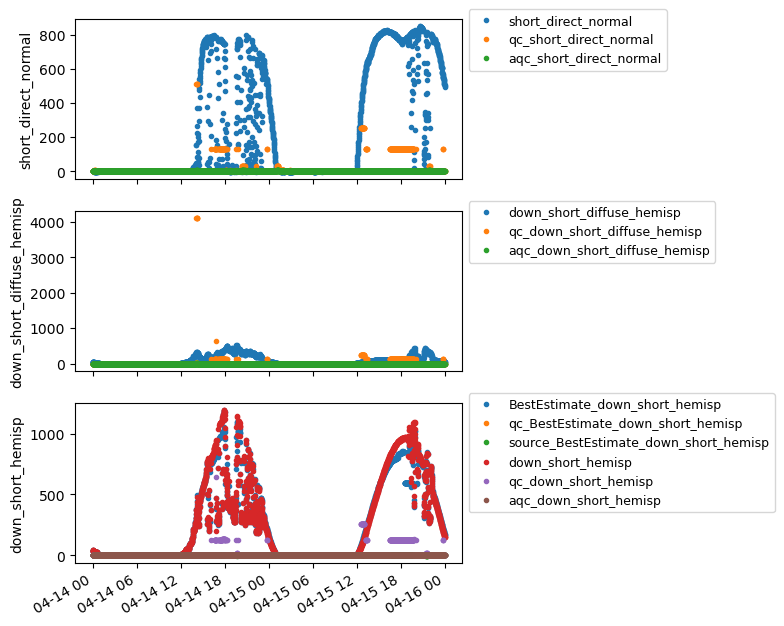

In [7]:
# exploring differences between qc and aqc
selcols = ["short_direct_normal", "down_short_diffuse_hemisp", "down_short_hemisp"]

fig, axs = plt.subplots(3, 1, sharex="col", figsize=[5, 8])

tstart = "2020-04-14 19:30:00"
tend = "2020-04-15 04:30:00"
pdf = df
# pdf = df[(df.index >= tstart) & (df.index <= tend)]

for ax, column in zip(axs.ravel(), selcols):
    for col in pdf.filter(regex=column).columns:
        ax.plot(pdf[col], ".", label=col)
    ax.set_ylabel(column)
    ax.legend(bbox_to_anchor=(1, 1.1), loc="upper left", fontsize=9)

fig.autofmt_xdate()
plt.tight_layout

<function matplotlib.pyplot.tight_layout(*, pad=1.08, h_pad=None, w_pad=None, rect=None)>

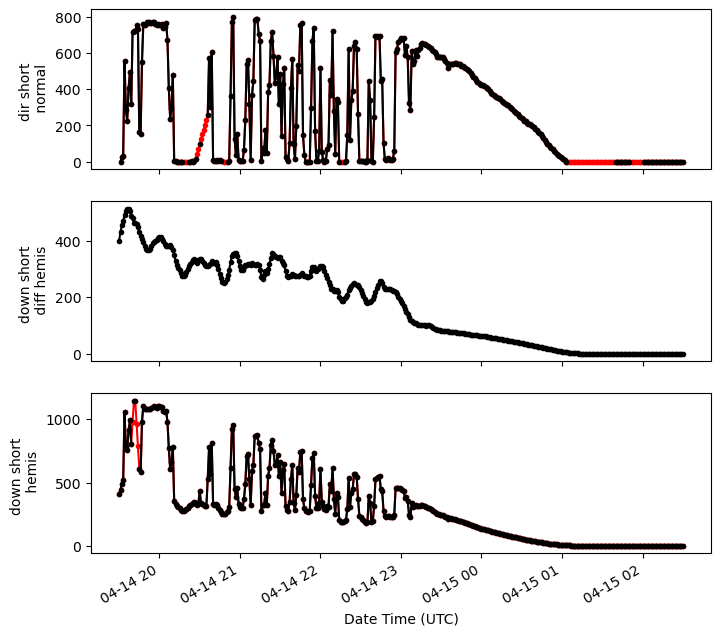

In [8]:
# interpolate missing values

fig, ax = plt.subplots(3, 1, sharex="col", figsize=[8, 8])

tstart = "2020-04-14 19:30:00"
tend = "2020-04-15 02:30:00"
pdf = df[(df.index >= tstart) & (df.index <= tend)]
# pdf = df

# interpolated df
col_list = ["short_direct_normal", "down_short_diffuse_hemisp", "down_short_hemisp"]

ax[0].plot(pdf.short_direct_normal.interpolate("linear"), ".-r")
ax[0].plot(pdf.short_direct_normal, ".-k")
ax[0].set_ylabel("dir short \n normal")

ax[1].plot(pdf.down_short_diffuse_hemisp, ".-k")
ax[1].set_ylabel("down short \n diff hemis")

ax[2].plot(pdf.down_short_hemisp.interpolate("linear"), ".-r")
ax[2].plot(pdf.down_short_hemisp, ".-k")
ax[2].set_ylabel("down short \n hemis")

ax[2].set_xlabel("Date Time (UTC)")

fig.autofmt_xdate()
plt.tight_layout

In [9]:
# convert solar data to input csv format - same as NonAnnualSimulation csv
sel_columns = [
    "short_direct_normal",
    "down_short_diffuse_hemisp",
    "down_short_hemisp",
    "Temp_Air",
    "wind_speed",
]

exportdf = df[sel_columns].copy()

# filter for time period
tstart = "2020-04-14 19:32:00"
tend = "2020-04-15 04:30:00"
exportdf = exportdf[(exportdf.index >= tstart) & (exportdf.index <= tend)]

exportdf.index.names = ["Timestamp"]

# replace negative DNI with zeros
exportdf["short_direct_normal"][exportdf["short_direct_normal"] < 0] = 0
exportdf["down_short_hemisp"][exportdf["down_short_hemisp"] < 0] = 0
exportdf["down_short_diffuse_hemisp"][exportdf["down_short_diffuse_hemisp"] < 0] = 0

# replace NaNs with interpolated values
exportdf = exportdf.interpolate("linear")

exportdf = exportdf.rename(
    columns={
        "short_direct_normal": "SRRL BMS Direct Normal Irradiance (W/m²_irr)",
        "down_short_hemisp": "SRRL BMS Global Horizontal Irradiance (W/m²_irr)",
        "down_short_diffuse_hemisp": "SRRL BMS Diffuse Horizontal Irradiance (W/m²_irr)",
        "Temp_Air": "SRRL BMS Dry Bulb Temperature (°C)",
        "wind_speed": "SRRL BMS Wind Speed at 19' (m/s)",
    }
)  # !!! wind_speed NEEDS TO BE INTERPOLATED TO 19' FROM 10m

exportdf.to_csv("ARM_solar_data_precursor.csv")

exportdf

,SRRL BMS Direct Normal Irradiance (W/m²_irr),SRRL BMS Diffuse Horizontal Irradiance (W/m²_irr),SRRL BMS Global Horizontal Irradiance (W/m²_irr),SRRL BMS Dry Bulb Temperature (°C),SRRL BMS Wind Speed at 19' (m/s)
Timestamp,,,,,
2020-04-14 19:32:00+00:00,23.790850,453.244812,492.057556,8.999994,3.061
2020-04-14 19:33:00+00:00,31.295860,468.213287,517.169861,9.020014,2.822
2020-04-14 19:34:00+00:00,556.028320,489.575195,1056.994629,9.170008,2.247
2020-04-14 19:35:00+00:00,284.873688,505.637787,781.409363,9.399988,1.911
2020-04-14 19:36:00+00:00,225.604706,511.143402,753.050476,9.779993,1.316
...,...,...,...,...,...
2020-04-15 04:26:00+00:00,0.000000,0.024290,0.243485,3.576013,4.603
2020-04-15 04:27:00+00:00,0.000000,0.020646,0.225866,3.576013,4.871
2020-04-15 04:28:00+00:00,0.000000,0.020646,0.219041,3.592004,5.212


In [11]:
# plot inputs vs hercules output (after running Hercules simulation)

# resultsdf = pd.read_csv("outputs/hercules_output.csv", index_col=False)
# resultsdf["real_time"] = pd.to_datetime(exportdf.index[1]) + pd.to_timedelta(
#     resultsdf.time, unit="s"
# )

# selcols = [
#     "SRRL BMS Direct Normal Irradiance (W/m²_irr)",
#     "SRRL BMS Global Horizontal Irradiance (W/m²_irr)",
#     "SRRL BMS Diffuse Horizontal Irradiance (W/m²_irr)",
# ]

# fig, axs = plt.subplots(4, 1, sharex=True, figsize=[10, 15])

# for ax, col in zip(axs.ravel(), selcols):
#     ax.plot(exportdf[col], ".-")
#     ax.set_ylabel(col[9:])

# axs[3].plot(resultsdf["real_time"], resultsdf["py_sims.solar_farm_0.outputs.power_mw"], ".-")
# axs[3].set_ylabel("PV power output [MW]")

# axs[-1].set_xlabel("Date Time [UTC]")

# fig.autofmt_xdate()
# plt.tight_layout